# Porftolio Optimiser

## Description
This program attempts to optimise a users portfolio using the Efficient Frontier. 

## Goal
Create portfolio of assets for which investment has maximum return for given risk level (ideally minimum) OR create portfolio that offers lowest risk for given expected return.

## Theory
Modern portfolio theory (MPT) is a model to creating a portfolio that aims to maximise the return for a given amount of risk. 

MPT encourages diversification of assets. Consider a portfolio of assets, {A, B, C} where the three assets are 'diverse'. If the three assets have little to zero correlation then we can have a portfolio with low variance on returns. 

Efficient Frontier is a graph of 'Expected returns' versues 'Volatility'. Points inside graph show set of optimal portfolios of expected returns for given risk (measured as volatility) or risk given expected returns. Points outside line are sub-optimal. 

### Assumptions
1. Asset Returns are (Jointly) Normally Distributed Random Variables
2. Correlations between Assets are Fixed and Constant Forever
3. All Investors Aim to Maximize Economic Utility
4. All Investors are Rational and Risk Averse
5. All Investors have Access to the Same Information at the Same Time
6. All Investors have Access to the Same Information at the Same Time
7. There are no Taxes or Transaction Costs
8. Investors are Price Takers
9. Every Investor has a Credit Limit
10. All Securities can be Divided into Parcels of Any Size

### Basics of the model



### 1. Portfolio Expected Return

Each asset in portfolio is weighted i.e. the proportion the asset makes up the portfolio. To calculate expected return of the porfolio we multiply weights of each asset by the expected returns of each asset, and sum.


### 2. Portfolio Variance

Calculate the annual covariance matrix and take the inner product with the weights. 

### 3. Sharpe Ratio

Sharpe ratio measures the return of an investment in relation to the risk-free rate and its risk profile.

In general, higher value of Sharpe ratio the better and lucractive the investement. 

### 4. Efficient Frontier

Plot of 'Expected return' vs 'Volatility'



# Import packages


In [11]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import relativedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define assets, weights of assets in portfolio and collect asset data

In [2]:
# Get tickers for portfolio
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Assign weights to the stocks
# should be optimised - done later - for now it is an example
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
# Get stock starting date
stock_start_date = datetime(2015, 1, 1)
stock_start_date_str = stock_start_date.strftime('%Y-%m-%d')

In [6]:
# Get stocks ending date (today)
today = datetime.today()
today_str = today.strftime('%Y-%m-%d')

In [7]:
# Create data frame to store the adjusted close price of the stocks

def create_dataframe(assets, start_date, end_date):
    
    df = pd.DataFrame()
    for stock in assets:
        df[stock] = web.DataReader(stock, data_source='yahoo', start= stock_start_date_str, end= today_str)['Adj Close']
    
    return df

df = create_dataframe(assets, stock_start_date, today)
    

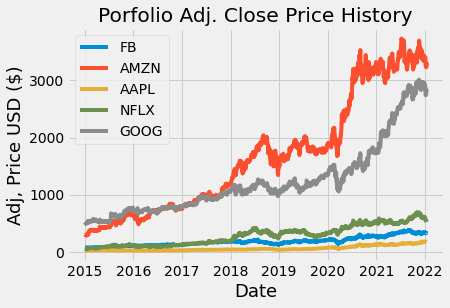

In [8]:
# Visually show stock portfolio

title = 'Porfolio Adj. Close Price History'

# Get the stocks

stocks = df

for c in stocks.columns.values:
    plt.plot(stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj, Price USD ($)', fontsize=18)
plt.legend(stocks.columns.values, loc='upper left')

# Calculate Log Percentage change in stock prices

Calculate the log of percentage changes as they are additive in time. So a +0.1 log change today and then -0.1 change tomorrow gives the same value of the stock as yesterday.

In [65]:
# Show daily simple return 
# calculate log of percentage change

assets_daily_returns = stocks.pct_change().apply(lambda x: np.log(1+x)).dropna()
assets_daily_returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-05,-0.016191,-0.020731,-0.028576,-0.052238,-0.021066
2015-01-06,-0.013565,-0.023098,0.000094,-0.017269,-0.023450
2015-01-07,0.000000,0.010544,0.013925,0.005178,-0.001715
2015-01-08,0.026309,0.006813,0.037702,0.021946,0.003148
2015-01-09,-0.005644,-0.011818,0.001072,-0.015578,-0.013035
...,...,...,...,...,...
2022-01-07,-0.002017,-0.004297,0.000988,-0.022352,-0.003981
2022-01-10,-0.011275,-0.006592,0.000116,-0.002239,0.011391
2022-01-11,0.019021,0.023719,0.016644,0.001832,0.010363


In [74]:
num_of_years = relativedelta.relativedelta(today,stock_start_date).years
num_of_years


7

# Expected Annual Return

In [76]:
# Average annual assets return using geometric average
assets_avg_daily_return = assets_daily_returns.dropna() + 1

assets_avg_annual_return = df.resample('Y').last().pct_change().mean()
assets_avg_annual_return
# num_of_years = relativedelta.relativedelta(today,stock_start_date).years

# geometric_avg_return = np.prod(assets_avg_daily_return)**(1/float(num_of_years) -1)
# geometric_avg_return

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-05,245.952127,244.817333,242.855937,236.940507,244.733482
2015-01-06,246.608788,244.225497,250.023535,245.682800,244.137535
2015-01-07,250.000000,252.635995,253.481161,251.294604,249.571317
2015-01-08,256.577191,251.703167,259.425618,255.486406,250.787030
2015-01-09,248.589008,247.045448,250.268029,246.105384,246.741200
...,...,...,...,...,...
2022-01-07,249.495685,248.925746,250.246968,244.411984,249.004760
2022-01-10,247.181190,248.352041,250.029046,249.440276,252.847667
2022-01-11,254.755282,255.929641,254.161123,250.458065,252.590744


In [30]:
# Annual portfolio return 
portfolio_expected_annual_return = np.sum(weights*geometric_avg_return)
portfolio_expected_annual_return

0.26489424133374934

# Portfolio Variance  and Covariance


Variances are an important indicator of how volatile a stock is. The larger the variance the larger the distance between the values and the mean, therefore the more spread out the data is and higher fluctuation.




Covariance matrix is a measure of how much two random variables vary together. In this case, how much each stock varies with the other. The diagonals show how much a single stock varies i.e. the variance and the off diagonal blocks show how each stock varies with the other. 

The covariance matrix have real entries and thus can be positive, negative or zero. Whilst the diagonal entries may only be positive the off diagonal entries may be all three. 

A positive entry implies as one variable is high/low the other is high/low
A negative entry implies as one variable is high/low the other is low/high
A zero entry implies the two variable do not vary with each other. 



In [31]:
# Create daily covariance matrix

cov_matrix_daily = assets_daily_returns.cov() 
cov_matrix_daily

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.000398,0.000223,0.000207,0.000228,0.000219
AMZN,0.000223,0.000354,0.000194,0.000255,0.000203
AAPL,0.000207,0.000194,0.000334,0.000197,0.000184
NFLX,0.000228,0.000255,0.000197,0.000658,0.000206
GOOG,0.000219,0.000203,0.000184,0.000206,0.000277


In [32]:
# Create and show annualised covariance matrix
# Calculate by multiplying the daily covariant matrix by number of trading days

cov_matrix_annual = cov_matrix_daily * 250 
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.099390,0.055660,0.051753,0.057017,0.054626
AMZN,0.055660,0.088581,0.048405,0.063821,0.050670
AAPL,0.051753,0.048405,0.083582,0.049195,0.046035
NFLX,0.057017,0.063821,0.049195,0.164615,0.051398
GOOG,0.054626,0.050670,0.046035,0.051398,0.069137


In [39]:
# Calculate the annual porfolio variance

port_annual_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_annual_variance

0.06249862382248804

In [34]:
port_daily_variance = np.dot(weights.T, np.dot(cov_matrix_daily, weights))
port_daily_variance

0.0002499944952899521

# Correlation

Correlation is a statistic that measures the degree which two random variables move in relation to each other

Values close to +1/0/-1 are positively/not/negatively correlated

In [35]:
port_correlation =  assets_daily_returns.corr()
port_correlation

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.593198,0.567818,0.445759,0.658986
AMZN,0.593198,1.000000,0.562547,0.528518,0.647484
AAPL,0.567818,0.562547,1.000000,0.419398,0.605592
NFLX,0.445759,0.528518,0.419398,1.000000,0.481791
GOOG,0.658986,0.647484,0.605592,0.481791,1.000000


# Portfolio volatility 

Volatility is a measure of change over some time. It is the standard deviation over some time period.

In [40]:
# Portfolio volatility
port_annual_volatility = np.sqrt(port_annual_variance)
port_annual_volatility

0.249997247629825

In [37]:
# Asset volatility
assets_volatility = assets_daily_returns.std().apply(lambda x: x*np.sqrt(250))
assets_volatility

FB      0.315261
AMZN    0.297626
AAPL    0.289106
NFLX    0.405728
GOOG    0.262938
dtype: float64

# Display 

In [38]:
print(f"Expected annual return: {portfolio_expected_annual_return*100}%")
print(f"Annual volatility/risk: {port_annual_volatility*100}%")
print(f"Annual variance {port_annual_variance*100}%")

Expected annual return: 26.489424133374932%
Annual volatility/risk: 24.9997247629825%
Annual variance 6.2498623822488035%


# Plot Efficient Frontier

In [42]:
# dataframe for assets yearly returns and volatility
assets_return = pd.concat([geometric_avg_return, assets_volatility], axis=1)
assets_return.columns = ['Returns', 'Volatility']
assets_return

,Returns,Volatility
FB,0.397189,0.315261
AMZN,0.174113,0.297626
AAPL,0.242827,0.289106
NFLX,0.218780,0.405728
GOOG,0.291563,0.262938


Run a loop where each iteration considers different weights for assets and calculates return and volatility

In [44]:
# initialise arrays for portfolio returns, volatility and weights

def efficient_frontier(stocks,assets_expected_yearly_return, cov_matrix_annual,portfolio_iterations=10000):
    
    # initialise 
    portfolio_returns = []
    portfolio_volatility = []
    portfolio_weights = []
    
    num_assets = len(stocks.columns)
    num_portfolios = portfolio_iterations
    
    for portfolio in np.arange(num_portfolios):
        weights = np.random.random(num_assets)
        weights = weights/np.sum(weights)
        portfolio_weights.append(weights)
        
        returns = np.dot(weights, assets_expected_yearly_return)
        portfolio_returns.append(returns)
        
        annual_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
        volatility = np.sqrt(annual_variance)
        portfolio_volatility.append(volatility)
    
    data = {'Returns': portfolio_returns, 'Volatility': portfolio_volatility}
    for counter, symbol in enumerate(stocks.columns.tolist()):
        
        data[f"{symbol} weight"] = [w[counter] for w in portfolio_weights]
    
    portfolios = pd.DataFrame(data)
    return portfolios
 
    

In [45]:
portfolios = efficient_frontier(stocks,geometric_avg_return, cov_matrix_annual,portfolio_iterations=10000)

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

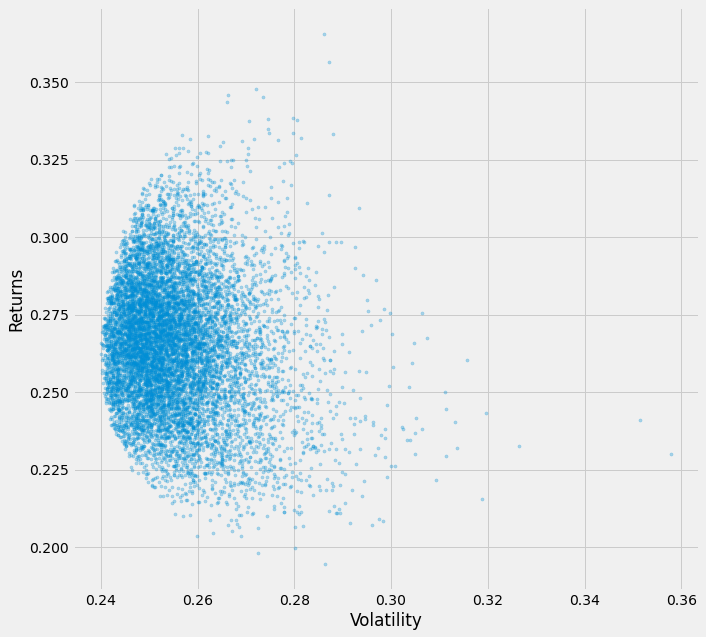

In [46]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [47]:
# Find minimum volatility 
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns        0.265917
Volatility     0.240087
FB weight      0.076018
AMZN weight    0.144669
AAPL weight    0.281140
NFLX weight    0.040980
GOOG weight    0.457194
Name: 234, dtype: float64

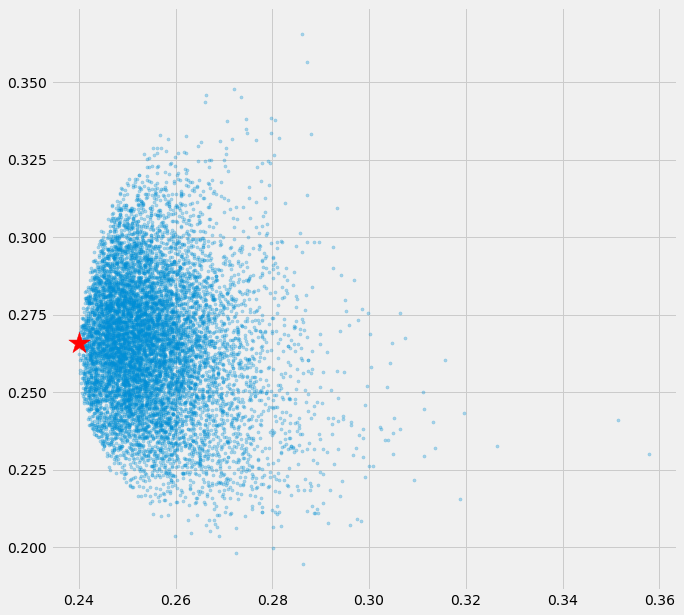

In [48]:
# Plot minimum volatility portfolio

plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

# Sharpe Ratio

In [49]:
# Finding optimal risky portfolio

risk_free_factor = 0.01

portfolios['SharpeRatio'] = (portfolios['Returns']-risk_free_factor)/portfolios['Volatility']
optimal_risky_port = portfolios.iloc[portfolios['SharpeRatio'].idxmax()]

In [50]:
optimal_risky_port

Returns        0.346088
Volatility     0.266385
FB weight      0.583523
AMZN weight    0.015634
AAPL weight    0.058493
NFLX weight    0.033283
GOOG weight    0.309066
SharpeRatio    1.261666
Name: 6033, dtype: float64

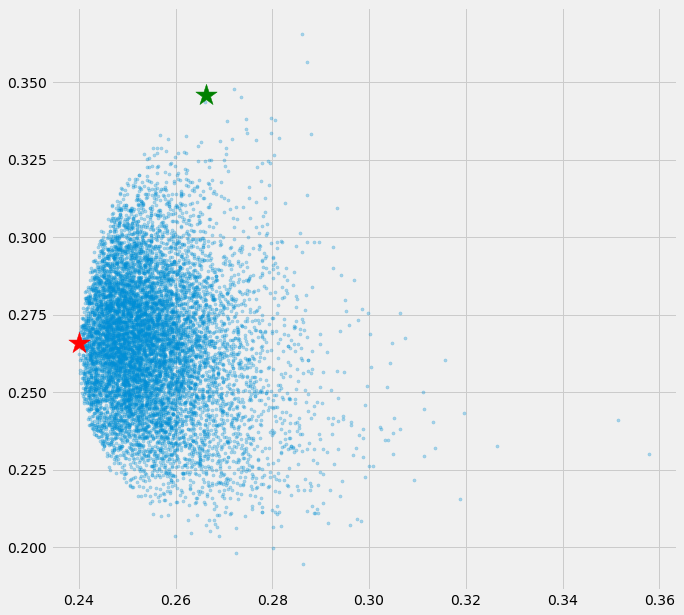

In [51]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)


# Normality Test - Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

## Assumptions

1. Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.


Test below shows data is not Gaussian and fails one of the assumptions of the MPT 


In [69]:
from scipy.stats import shapiro

def shapiro_wilk_test(data):
    stat, p = shapiro(data)


    print(f'stat={stat}, p={p}')
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
        
for col in assets_daily_returns:
    data = assets_daily_returns[col]
    print(col)
    shapiro_wilk_test(assets_daily_returns[col])

FB
stat=0.9023596048355103, p=3.400574970929524e-32
Probably not Gaussian
AMZN
stat=0.9242342114448547, p=5.554172514731336e-29
Probably not Gaussian
AAPL
stat=0.9281512498855591, p=2.480623768425009e-28
Probably not Gaussian
NFLX
stat=0.9219618439674377, p=2.3956657624560517e-29
Probably not Gaussian
GOOG
stat=0.9099771976470947, p=3.8008109903047017e-31
Probably not Gaussian


In [72]:
weights = np.random.random(5)
weights/np.sum(weights)



array([0.2608232 , 0.12011662, 0.22430751, 0.21890189, 0.17585078])